<a href="https://colab.research.google.com/github/vikash-chaurasia108/ORC/blob/master/Project_2_Password_strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading Dataset

In [ ]:
data = pd.read_csv('data.csv', error_bad_lines= False)
data.head()

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [ ]:
data['strength'].unique()

array([1, 2, 0])

### Code to check all missing values in the dataset

In [ ]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [ ]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [ ]:
data.dropna(inplace = True)

In [ ]:
data.isnull().sum()

password    0
strength    0
dtype: int64

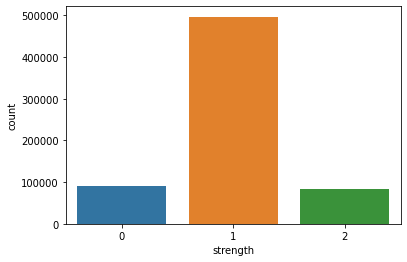

In [ ]:
sns.countplot(data['strength'])

In [ ]:
password_tuple = np.array(data)

In [ ]:
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

### Shuffling randomly for robustness of dataset

In [ ]:
import random
random.shuffle(password_tuple)

In [ ]:
x= [labels[0] for labels in password_tuple[:30000,:]]
y= [labels[1] for labels in password_tuple[:30000,:]]
y

### Creating a function 'word_divide_char' to split input into character of list

In [ ]:
def word_divide_char(inputs):
  character= []
  for i in inputs:
    character.append(i)
  return character

### Import TF-IDF vectorizer to convert String data into numerical data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(tokenizer = word_divide_char)

### Apply TF-IDF vectorizer on data

In [ ]:
X= vectorizer.fit_transform(x)

In [ ]:
X.shape

(30000, 72)

In [ ]:
vectorizer.get_feature_names()

[' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '}',
 '~',
 '±',
 '³',
 '¿',
 'ó',
 'ô',
 'ú',
 'þ']

In [ ]:
first_document_vector  =X[0]
first_document_vector

<1x72 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [ ]:
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.5698892 ],
        [0.        ],
        [0.591542  ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.2848036 ],
        [0.21896242],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [ ]:
df = pd.DataFrame(first_document_vector.T.todense(), vectorizer.get_feature_names(), columns = ['TF-IDF'])
df.sort_values(by = ['TF-IDF'], ascending = False)

,TF-IDF
7,0.591542
5,0.569889
z,0.333102
k,0.292044
d,0.284804
...,...
\,0.000000
],0.000000
^,0.000000
_,0.000000


### Split data into train & test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train.shape

(24000, 72)

### Apply Logistic on data as use-case is Classification

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=0, multi_class = 'multinomial')

In [ ]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Doing prediction for specific custom data

In [ ]:
dt = np.array(['#$%@45abcd'])
pred =  vectorizer.transform(dt)
clf.predict(pred)

array([1])

### Doing prediction for X test data

In [ ]:
y_pred=clf.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 2])

### Check Accuracy of your model using confusion_matrix,  accuracy_score

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[ 205  620    1]
 [ 148 4197   85]
 [   3  241  500]]
0.817


### Creating report of model

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.25      0.35       826
           1       0.83      0.95      0.88      4430
           2       0.85      0.67      0.75       744

    accuracy                           0.82      6000
   macro avg       0.75      0.62      0.66      6000
weighted avg       0.80      0.82      0.79      6000

